In [5]:
import sys
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
sys.path.append('./../../RoboPoint/')

from robopoint_utils import load_model, get_coordinates, generate_prompt, do_inference, calculate_probs_per_coordinate
from utils import extract_all, plot_scatter, calculate_euclidian_distance, visualize_points_on_image, close_all_images, plot_euclidean_bplot

2025-01-26 16:27:46.706173: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-26 16:27:47.095646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-26 16:27:47.095689: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-26 16:27:47.095719: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 16:27:47.104907: I tensorflow/core/platform/cpu_feature_g

In [6]:
model_name = "wentao-yuan/robopoint-v1-vicuna-v1.5-13b"
model, processor, tokenizer = load_model(model_name)

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint at wentao-yuan/robopoint-v1-vicuna-v1.5-13b were not used when initializing LlavaLlamaForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.class_embedding', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

def plot_euclidean_bplot(labels, distances, title="Euclidean Distance Boxplots"):
    # Create the boxplots side by side
    plt.boxplot(distances)
    #plt.xticks(np.arange(1, len(labels) + 1), labels)  # Set x-axis labels
    plt.ylabel('Euclidean distance from ground truth')
    plt.title(title)
    plt.show()
    plt.close()

In [8]:
PROMPTS = [
    "Locate several points within the space of the ",
    "Locate several points within the vacant space of the ",
    "Identify several spots of the",
    "Identify with several spots the",
    "Identify the",
    "Locate the",
]

Task: 1
Move the can from the top left of the burner to the bottom left of the burner
Task: 2
pick up red srewdriver
Task: 3
take the broccoli and put it between the two right burners
Task: 4
move arch on the table and place it on top of another arch
Task: 5
take sushi out of pan
Task: 6
pick up glass cup
Task: 7
open low fridge
Task: 8
Place the pot to the right of the blue fork.


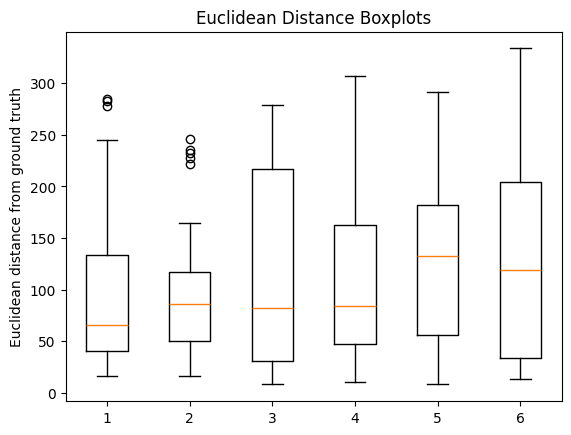

In [18]:
tasks, images, ground_truths, object_list = extract_all("../data/first_experiments")

NUMBER_OF_RUNS = 5

prompt_distance_list = [[] for _ in range(len(PROMPTS))]
for i in range(len(tasks)):
    print(f"Task: {i + 1}")
    print(tasks[i])

    image_path = images[i]
    task = tasks[i]
    objects = object_list[i]
    groundtruths = ground_truths[i]

    with Image.open(image_path) as image:
        width, height = image.size
        for object, groundtruth in zip(objects, groundtruths):
            coordinate_list = []
            for p in range(len(PROMPTS)): 
                prompt = generate_prompt(object, PROMPTS[p])
                for j in range(NUMBER_OF_RUNS):
                    generated_text = do_inference(image, prompt, model, processor, tokenizer, 0.2)
                    coordinates = get_coordinates(generated_text, width, height)
                    distance = calculate_euclidian_distance(coordinates[0], groundtruth)
                    prompt_distance_list[p].append(distance)
                    #print(f"Run: {j + 1} - Output: {generated_text}")

plot_euclidean_bplot(PROMPTS, prompt_distance_list)

Task: 1
pull the oven tray
Task: 2
move the fruit from the left stove to the sink
Task: 3
open low fridge
Task: 4
open the drawer
Task: 5
Move the can from the top left of the burner to the bottom left of the burner
Task: 6
Place the pot to the right of the blue fork.
Task: 7
move the pot from the right to the left stove

Task: 8
put potato in pot or pan
Task: 9
take cucumber out of cup
Task: 10
move the banana from the left stove to the sink
Task: 11
pick up the toast and put it to the sink
Task: 12
close the microwave
Task: 13
push the toaster lever
Task: 14
pick up glass cup
Task: 15
take the broccoli and put it between the two right burners
Task: 16
move the pot from the left to the right stove


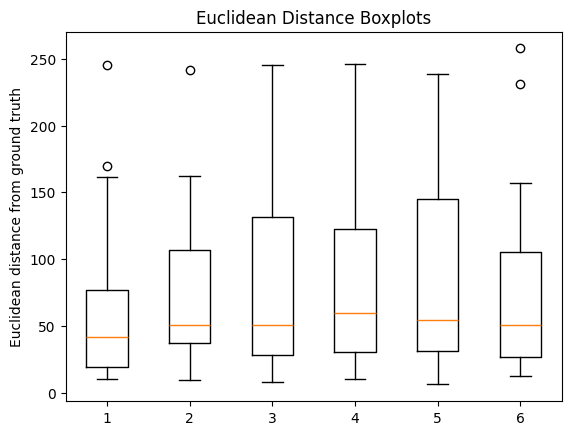

In [10]:
tasks, images, ground_truths, object_list = extract_all("../data/base_experiments")

NUMBER_OF_RUNS = 1

prompt_distance_list = [[] for _ in range(len(PROMPTS))]
for i in range(len(tasks)):
    print(f"Task: {i + 1}")
    print(tasks[i])

    image_path = images[i]
    task = tasks[i]
    objects = object_list[i]
    groundtruths = ground_truths[i]

    with Image.open(image_path) as image:
        width, height = image.size
        for object, groundtruth in zip(objects, groundtruths):
            coordinate_list = []
            for p in range(len(PROMPTS)): 
                prompt = generate_prompt(object, PROMPTS[p])
                for j in range(NUMBER_OF_RUNS):
                    generated_text = do_inference(image, prompt, model, processor, tokenizer, 0.2)
                    coordinates = get_coordinates(generated_text, width, height)
                    distance = calculate_euclidian_distance(coordinates[0], groundtruth)
                    prompt_distance_list[p].append(distance)
                    #print(f"Run: {j + 1} - Output: {generated_text}")

plot_euclidean_bplot(PROMPTS, prompt_distance_list)

In [11]:
close_all_images("../data/base_experiments")

Found and closed 26 images.
